# K Means Clustering Project - Solutions

** Credit: [Pieriandata.com](http://www.pieriandata.com) **

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
It is important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [2]:
df = pd.read_pickle('DATA_FREQ_VDJ_CDR3_98')
df.head()

,SUBJECTn,CLIN,SEX,V1,V2,V3,V4,V5,V6,V7,...,CDR3_AA_GRAVY.quter,CDR3_AA_GRAVY.tail,CDR3_AA_LENGTH.mean,CDR3_AA_LENGTH.str,CDR3_AA_LENGTH.quter,CDR3_AA_LENGTH.tail,CDR3_AA_POLARITY.mean,CDR3_AA_POLARITY.str,CDR3_AA_POLARITY.quter,CDR3_AA_POLARITY.tail
0,BC_10,Healthy,NaN,0.220240,0.023630,0.459240,0.232679,0.055238,0.008488,0.000484,...,-1.0,-0.17333333333333306,15.566583363084613,3.8140400573600988,13.0,18.0,8.413516101784207,0.5214524393531481,8.04705882352941,8.75454545454545
1,BC_11,Healthy,NaN,0.209268,0.026029,0.476099,0.235566,0.044202,0.008683,0.000154,...,-0.995833333333333,-0.123076923076923,15.436090515166105,3.6172652136720735,13.0,18.0,8.482599018559231,0.49800555512505285,8.13529411764706,8.805882352941179
2,BC_12,Healthy,NaN,0.205156,0.024936,0.415683,0.298063,0.031972,0.010342,0.013848,...,-0.986666666666667,-0.1459935897435895,16.115639999005246,4.112519249025375,13.0,19.0,8.439949841021718,0.4908470198259828,8.1,8.75333333333333
3,BC_13,Healthy,NaN,0.201297,0.046151,0.420261,0.275598,0.049830,0.006616,0.000247,...,-1.0,-0.12222222222222195,15.440365905091548,3.732484244150953,13.0,18.0,8.470984259102124,0.5001470227375485,8.125,8.79375
4,BC_14,Healthy,NaN,0.246696,0.021840,0.452630,0.223807,0.046810,0.007985,0.000231,...,-0.963157894736842,-0.123076923076923,15.976363377474014,3.9563694966376097,13.0,19.0,8.441183495909993,0.4968433667652791,8.091205533596842,8.76


** Check if we have null values.**

In [10]:
df['CDR3_AA_LENGTH.mean'].isnull().values.any()

False

## EDA

It's time to create some data visualizations!

** Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

TypeError: Could not convert 15.56658336308461315.43609051516610516.11563999900524615.44036590509154815.97636337747401414.83959394796489715.37134912901922615.9951891795973915.6255015341043215.65855286807374316.33995855587660315.31812313582335415.70021827425192716.1591802358225715.47252747252747315.95611111111111115.9492286955219415.86726570505241615.76140841489767316.27747136190072315.95534180693919715.95678001777445215.12329585883022715.8603291131365315.24491397349453715.6788759546229716.0572607404820115.7975856865703815.84496550830715516.3891822366639615.66623482558418515.91383812010443915.77213576603166215.45021452877644615.6843102295520416.13798562903422315.90405351437699715.46571728669483815.6555811115283515.32895676318921115.7515.89740411760655515.53976670201484616.19604124112440515.34596418375291916.03667860253556715.21358246496586416.12600321027287414.4561946584119216.13327659574468215.82063834708195115.94250072386835315.7452424960299916.2397320988870316.0848766163027514.89635854341736715.84455107968177915.69398367561874616.41847826086956616.0264248552364715.71801725185275215.51793596833933716.25635871666022315.64473028218167316.50263748256836415.84073619631901815.5309924353618615.92366957069381815.92534733653782915.85908355336002114.20922711538947416.0141699359900916.09333211210844515.7884920455060515.8494995191108915.97795728045592715.81477508138502615.76478151461161116.0513510178901915.50485245578599916.33237481408031815.74202611580862815.5139591836734716.04480746154685315.85544958259872115.8402054977315215.44046214802044616.46852721431151416.185032181494515.79133226324237615.65778740759622816.08846504361411416.14243513999486315.526025719534615.77104189370707315.59874874488298416.6479750778816216.967021276595744 to numeric

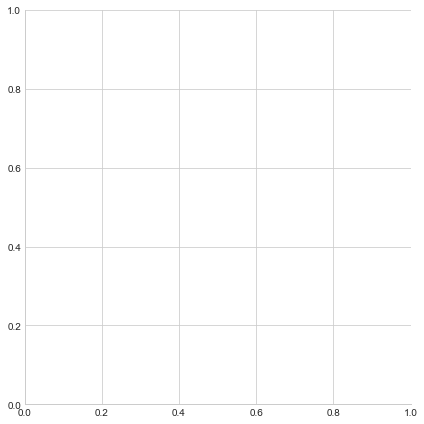

In [12]:
sns.set_style('whitegrid')
sns.lmplot('CDR3_AA_POLARITY.mean','CDR3_AA_LENGTH.mean',data=df, hue='CLIN',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

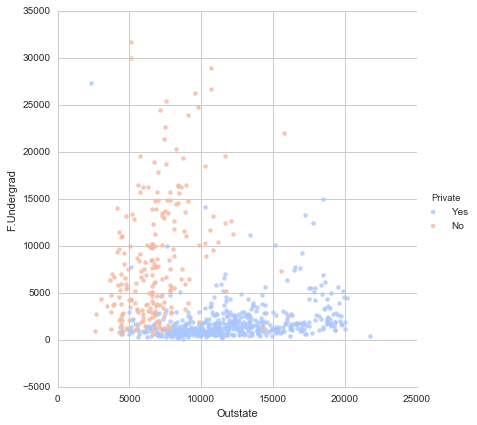

In [112]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

** Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist'). **

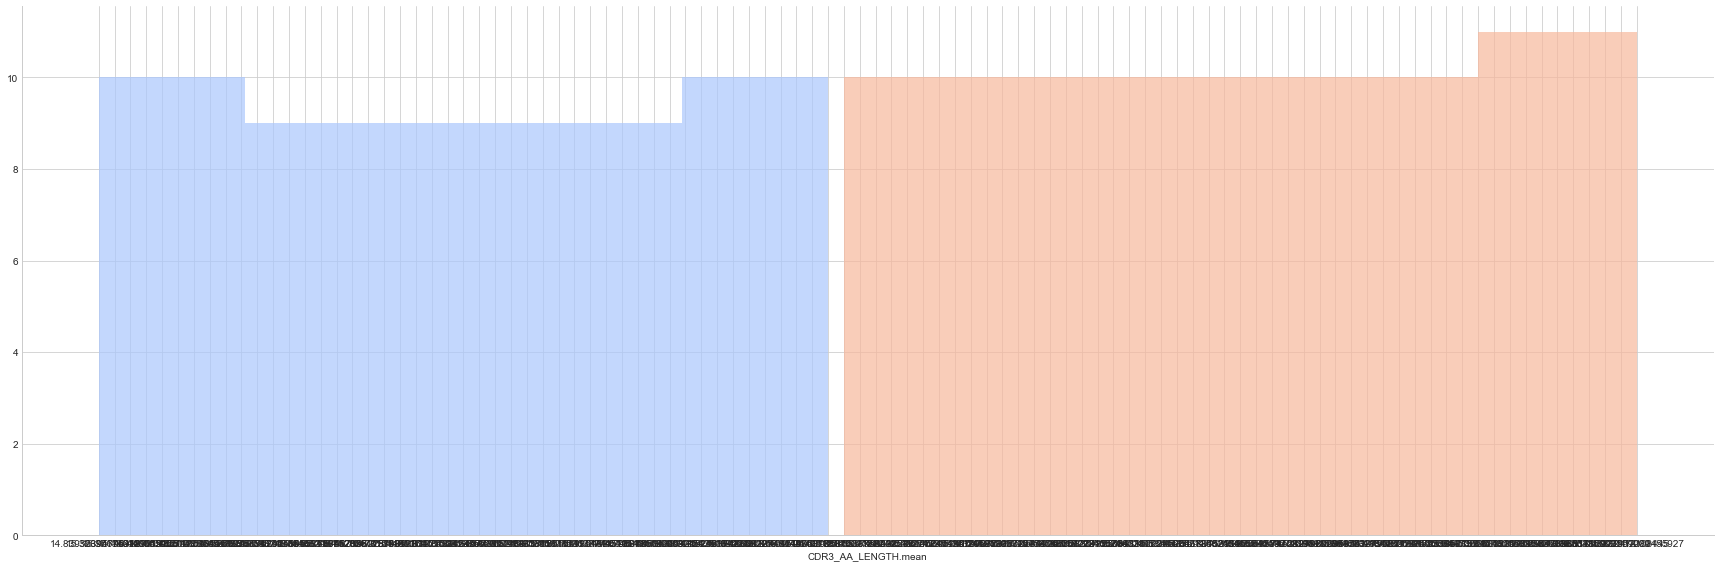

In [38]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df,hue="CLIN",palette='coolwarm',size=8,aspect=3)
g = g.map(plt.hist,'CDR3_AA_LENGTH.mean',bins=5,alpha=0.7)

**Create a similar histogram for the Grad.Rate column.**

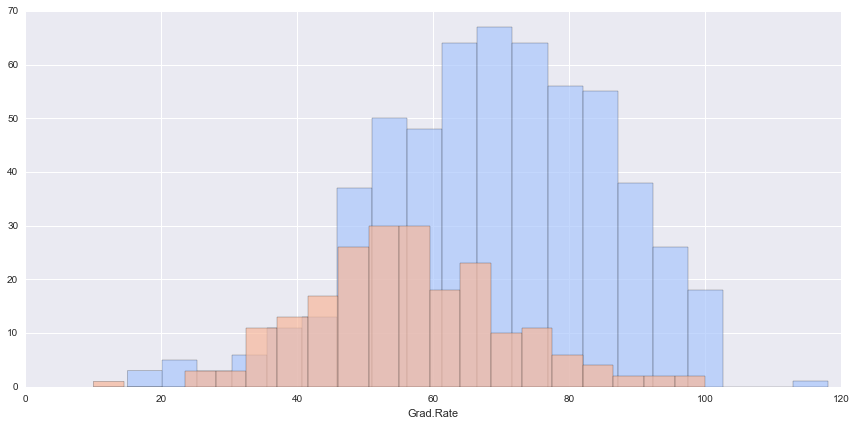

In [110]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

** Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [113]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [93]:
df['Grad.Rate']['Cazenovia College'] = 100

/Users/marci/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


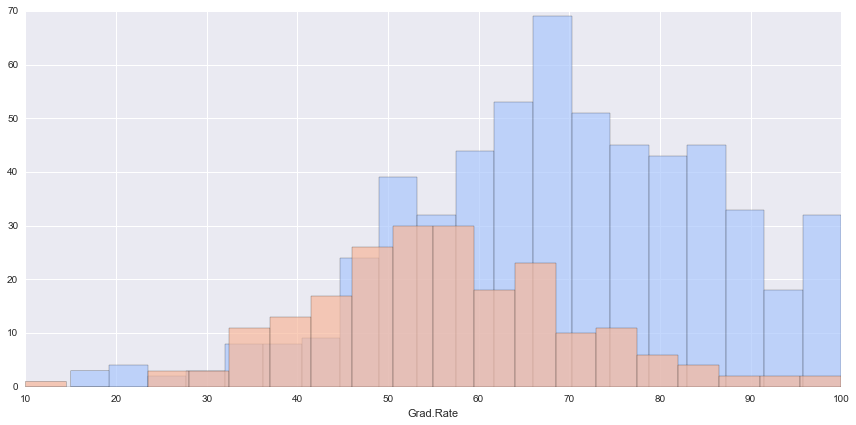

In [95]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

# selected data

In [48]:
data_select = df[['SUBJECTn','SEX','CLIN','V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58', 'V4_J3-VJ', 'D6-13',
       'V2_J1-VJ', 'V1_J2-VJ', 'D3-16', '69-JL', '21-JL', 'V1_J5_VJ',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V2_J2-VJ', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V2_J5_VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', '66-JL', '72-JL', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ', 'V1',
       'CDR3_AA_AROMATIC.mean', 'V2_J6-VJ', 'D3', 'V3_J1-VJ', 'V7-4-1',
       'D6-25', '33-JL', 'V3-23', '52-JL', 'V3-33', 'V1_J3_VJ', 'V3-47',
       '60-JL', 'D6-6', '114-JL', 'V7', 'V7_J5_VJ', 'D5/OR15-5a', 'D1-7',
       'V4_J1-VJ', 'D5', 'V7_J6-VJ', 'V6_J4_VJ', '48-JL', 'D5-24']]
data_select.head()

,SUBJECTn,SEX,CLIN,V2_J2_VJ,D6-19,V4-4,D3-10,V4-34,V2_J4-VJ,V1-8,...,V7,V7_J5_VJ,D5/OR15-5a,D1-7,V4_J1-VJ,D5,V7_J6-VJ,V6_J4_VJ,48-JL,D5-24
0,BC_10,NaN,Healthy,0.000561,0.078486,0.017767,0.081137,0.072598,0.012210,0.015167,...,0.000484,0.000102,0.001759,0.017461,0.002014,0.099286,0.000127,0.004028,0.109024,0.024675
1,BC_11,NaN,Healthy,0.000655,0.074485,0.018232,0.083361,0.076468,0.014189,0.015864,...,0.000154,NaN,0.001367,0.010011,0.003446,0.092101,0.000039,0.004351,0.112142,0.025643
2,BC_12,NaN,Healthy,0.000472,0.071899,0.008279,0.084206,0.152027,0.012306,0.032295,...,0.013848,0.002983,0.001218,0.011809,0.003282,0.094100,0.003058,0.004475,0.106755,0.025781
3,BC_13,NaN,Healthy,0.001541,0.091517,0.002675,0.084669,0.096606,0.023439,NaN,...,0.000247,0.000029,0.001076,0.009931,0.003199,0.102524,0.000145,0.003126,0.109867,0.029793
4,BC_14,NaN,Healthy,0.000587,0.079908,0.020346,0.086329,0.071229,0.010813,0.021644,...,0.000231,0.000089,0.001014,0.008750,0.002774,0.071923,0.000018,0.003539,0.102922,0.018745


In [60]:
data_select3.iloc[:,3:].isnull().values.any()

False

** replace nan values with zero **

In [59]:
data_select3 = data_select
data_select3.iloc[:,3:] = data_select3.iloc[:,3:].fillna(value=0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,SUBJECTn,SEX,CLIN,V2_J2_VJ,D6-19,V4-4,D3-10,V4-34,V2_J4-VJ,V1-8,...,V7,V7_J5_VJ,D5/OR15-5a,D1-7,V4_J1-VJ,D5,V7_J6-VJ,V6_J4_VJ,48-JL,D5-24
0,BC_10,NaN,Healthy,0.000561,0.078486,0.017767,0.081137,0.072598,0.012210,0.015167,...,0.000484,0.000102,0.001759,0.017461,0.002014,0.099286,0.000127,0.004028,0.109024,0.024675
1,BC_11,NaN,Healthy,0.000655,0.074485,0.018232,0.083361,0.076468,0.014189,0.015864,...,0.000154,0.000000,0.001367,0.010011,0.003446,0.092101,0.000039,0.004351,0.112142,0.025643
2,BC_12,NaN,Healthy,0.000472,0.071899,0.008279,0.084206,0.152027,0.012306,0.032295,...,0.013848,0.002983,0.001218,0.011809,0.003282,0.094100,0.003058,0.004475,0.106755,0.025781
3,BC_13,NaN,Healthy,0.001541,0.091517,0.002675,0.084669,0.096606,0.023439,0.000000,...,0.000247,0.000029,0.001076,0.009931,0.003199,0.102524,0.000145,0.003126,0.109867,0.029793
4,BC_14,NaN,Healthy,0.000587,0.079908,0.020346,0.086329,0.071229,0.010813,0.021644,...,0.000231,0.000089,0.001014,0.008750,0.002774,0.071923,0.000018,0.003539,0.102922,0.018745
5,BC_16,NaN,Healthy,0.000968,0.091807,0.005984,0.081892,0.101644,0.010244,0.009702,...,0.000097,0.000058,0.001259,0.011735,0.003931,0.094034,0.000000,0.003060,0.121880,0.023799
6,BC_17,NaN,Healthy,0.000808,0.068472,0.012568,0.073485,0.056997,0.015966,0.019482,...,0.000143,0.000000,0.001497,0.013210,0.002542,0.082442,0.000119,0.004015,0.115491,0.019743
7,BC_18,NaN,Healthy,0.000591,0.075591,0.009075,0.082520,0.045039,0.013169,0.020846,...,0.000177,0.000000,0.001063,0.011850,0.002618,0.083307,0.000098,0.004016,0.098012,0.023110
8,Biotech_045,M,Healthy,0.001444,0.073365,0.025015,0.082499,0.049381,0.023276,0.017089,...,0.013406,0.002239,0.001414,0.011344,0.003270,0.080466,0.003182,0.003182,0.108692,0.019446
9,Biotech_050,M,Healthy,0.000744,0.082536,0.010747,0.097079,0.077842,0.009849,0.000282,...,0.007489,0.001180,0.001282,0.010952,0.002437,0.099105,0.001539,0.003386,0.106312,0.025546


In [65]:
df3 = data_select3

## K Means Cluster Creation

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

In [63]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [64]:
kmeans = KMeans(n_clusters=2)

**Fit the model to all the data except for the Private label.**

In [66]:
df2 = df3.drop('SEX',axis=1)

In [67]:
df2 = df2.drop('SUBJECTn',axis=1)

In [68]:
kmeans.fit(df2.drop('CLIN',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

** What are the cluster center vectors?**

In [69]:
kmeans.cluster_centers_

array([[7.89364335e-04, 8.56921814e-02, 1.81403727e-02, 1.12690356e-01,
        6.71626173e-02, 1.43046178e-02, 1.08492665e-02, 5.15763717e-01,
        7.20348049e-03, 7.31835258e-02, 2.64275506e-03, 3.18426582e-02,
        9.34862032e-02, 3.99372099e-04, 3.22176149e-03, 3.44426400e-02,
        3.64888213e-02, 1.89035939e-03, 2.12645148e-02, 5.95203689e-05,
        4.57481319e-06, 1.76134808e-05, 7.89364335e-04, 2.84162674e-03,
        5.34649363e-03, 6.24329580e-05, 8.38729566e-06, 7.31835258e-02,
        4.42385206e-03, 2.51996747e-02, 1.29632888e-05, 9.90520403e-06,
        1.38995812e-03, 1.28671334e-02, 4.77890973e-02, 2.53932215e-02,
        4.42999836e-03, 3.79057875e-02, 3.30378542e-04, 9.37903905e-02,
        1.95473471e-02, 1.64956766e-05, 9.21426706e-04, 1.56573986e-01,
        2.17670919e-01, 3.36490878e-03, 3.26161548e-01, 8.27050931e-03,
        4.31988385e-03, 3.02705604e-03, 2.08687941e-02, 1.24985984e-01,
        4.71998584e-06, 3.77050285e-02, 1.99494702e-02, 1.551195

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

** Create a new column for df called 'Cluster', which is a 1 for a Celiac, and a 0 for a Healty.**

In [70]:
def converter(cluster):
    if cluster=='Celiac':
        return 1
    else:
        return 0

In [74]:
df3['Cluster'] = df3['CLIN'].apply(converter)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
display(df3)

,SUBJECTn,SEX,CLIN,V2_J2_VJ,D6-19,V4-4,D3-10,V4-34,V2_J4-VJ,V1-8,...,V7_J5_VJ,D5/OR15-5a,D1-7,V4_J1-VJ,D5,V7_J6-VJ,V6_J4_VJ,48-JL,D5-24,Cluster
0,BC_10,NaN,Healthy,0.000561,0.078486,0.017767,0.081137,0.072598,0.012210,0.015167,...,0.000102,0.001759,0.017461,0.002014,0.099286,0.000127,0.004028,0.109024,0.024675,0
1,BC_11,NaN,Healthy,0.000655,0.074485,0.018232,0.083361,0.076468,0.014189,0.015864,...,0.000000,0.001367,0.010011,0.003446,0.092101,0.000039,0.004351,0.112142,0.025643,0
2,BC_12,NaN,Healthy,0.000472,0.071899,0.008279,0.084206,0.152027,0.012306,0.032295,...,0.002983,0.001218,0.011809,0.003282,0.094100,0.003058,0.004475,0.106755,0.025781,0
3,BC_13,NaN,Healthy,0.001541,0.091517,0.002675,0.084669,0.096606,0.023439,0.000000,...,0.000029,0.001076,0.009931,0.003199,0.102524,0.000145,0.003126,0.109867,0.029793,0
4,BC_14,NaN,Healthy,0.000587,0.079908,0.020346,0.086329,0.071229,0.010813,0.021644,...,0.000089,0.001014,0.008750,0.002774,0.071923,0.000018,0.003539,0.102922,0.018745,0
5,BC_16,NaN,Healthy,0.000968,0.091807,0.005984,0.081892,0.101644,0.010244,0.009702,...,0.000058,0.001259,0.011735,0.003931,0.094034,0.000000,0.003060,0.121880,0.023799,0
6,BC_17,NaN,Healthy,0.000808,0.068472,0.012568,0.073485,0.056997,0.015966,0.019482,...,0.000000,0.001497,0.013210,0.002542,0.082442,0.000119,0.004015,0.115491,0.019743,0
7,BC_18,NaN,Healthy,0.000591,0.075591,0.009075,0.082520,0.045039,0.013169,0.020846,...,0.000000,0.001063,0.011850,0.002618,0.083307,0.000098,0.004016,0.098012,0.023110,0
8,Biotech_045,M,Healthy,0.001444,0.073365,0.025015,0.082499,0.049381,0.023276,0.017089,...,0.002239,0.001414,0.011344,0.003270,0.080466,0.003182,0.003182,0.108692,0.019446,0
9,Biotech_050,M,Healthy,0.000744,0.082536,0.010747,0.097079,0.077842,0.009849,0.000282,...,0.001180,0.001282,0.010952,0.002437,0.099105,0.001539,0.003386,0.106312,0.025546,0


** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [77]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df3['Cluster'],kmeans.labels_))
print(classification_report(df3['Cluster'],kmeans.labels_))

[[15 32]
 [20 31]]
             precision    recall  f1-score   support

          0       0.43      0.32      0.37        47
          1       0.49      0.61      0.54        51

avg / total       0.46      0.47      0.46        98



In [123]:
#from sklearn.metrics import confusion_matrix,classification_report
#print(confusion_matrix(df['Cluster'],kmeans.labels_))
#print(classification_report(df['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
             precision    recall  f1-score   support

          0       0.21      0.65      0.31       212
          1       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777



Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups...